In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

############################## 문자 로딩 #####################################
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 1. 참고 사이트

- http://matplotlib.org
- http://seaborn.pydata.org



# 2. 기본 그래프

- 선(line), 막대(bar), 히스토그램, 산포도(산점도, scatter), 상자(box)



# 3. 데이터의 종류


## 1) 질적데이터

- 요약 방법 : 도표
- 정리 방법 : 도수분포표, 분할표
- 그래프 : 막대그래프, 원그래프, 파이그래프, ..


## 2) 양적데이터

- 요약 방법 : 수치
- 정리 방법 : 산술 평균, 중앙값, ..
- 그래프 : 선그래프(시계열그래프), 히스토그램, 상자그래프, 산포도, ..

# 4. 그래프 그리기

## 1) 준비 작업

- figure() : 그래프의 영역 생성
- add_subplot() : 그래프를 그리기 위한 위치 지정

<AxesSubplot:>

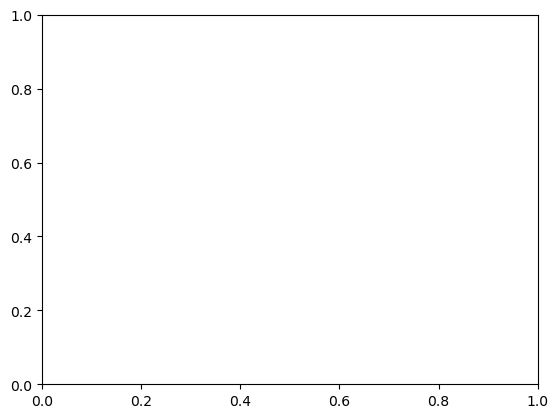

In [15]:
fig = plt.figure()
fig.add_subplot(111)  # 111 : 1행1열1번째 위치, 221: 2행2열1번째위치

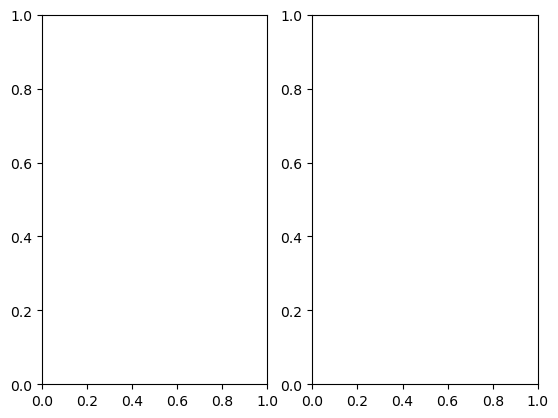

In [19]:
fig = plt.figure()
axis1 = fig.add_subplot(121)
axis2 = fig.add_subplot(122)

## 2) 선 그래프
- plot: 데이터프레임에선 바로 그래프 그리기 가능(2차원배열)

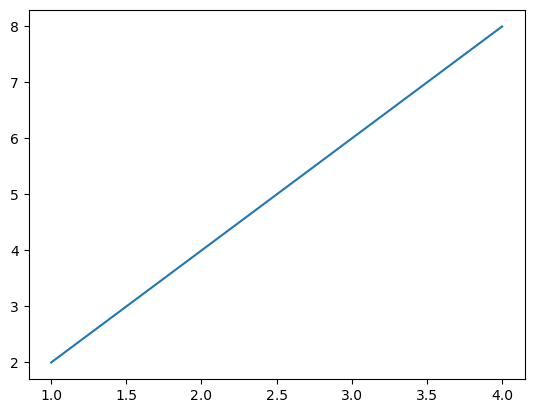

In [21]:
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

plt.plot(x, y)
plt.show()

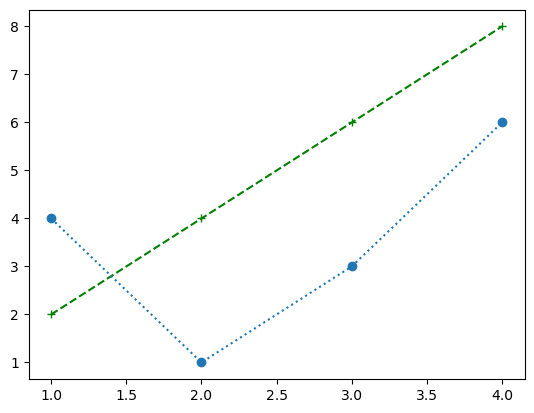

In [44]:
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

x2 = np.array([1, 2, 3, 4])
y2 = np.array([4, 1, 3, 6])

plt.plot(x, y, color="green", linestyle="dashed", marker="+")
plt.plot(x2, y2, linestyle="dotted", marker="o")

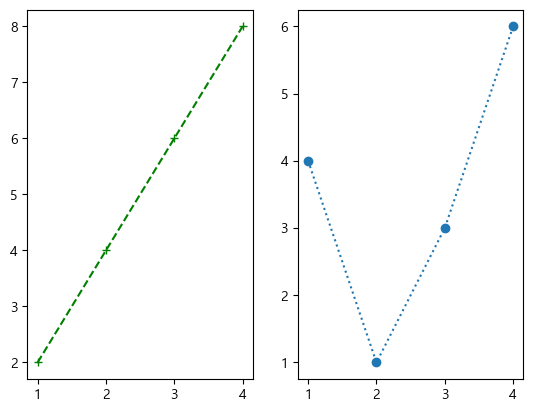

In [88]:
#### 각각 다른 장소에 그리기 ####

x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

x2 = np.array([1, 2, 3, 4])
y2 = np.array([4, 1, 3, 6])

fig = plt.figure()
axis1 = fig.add_subplot(121)
axis2 = fig.add_subplot(122)

axis1.plot(x, y, color="green", linestyle="dashed", marker="+")
axis2.plot(x2, y2, linestyle="dotted", marker="o")

<AxesSubplot:>

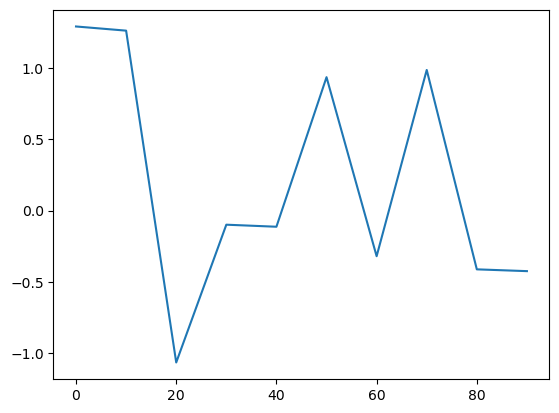

In [52]:
s = pd.Series(np.random.randn(10), index=np.arange(0, 100, 10))
s.plot()

<AxesSubplot:>

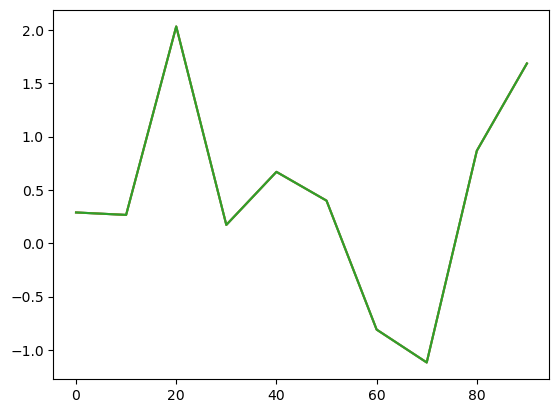

In [69]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))  # cumsum() : 누적값
s.plot()
s.plot(kind="line")
s.plot.line()

<AxesSubplot:>

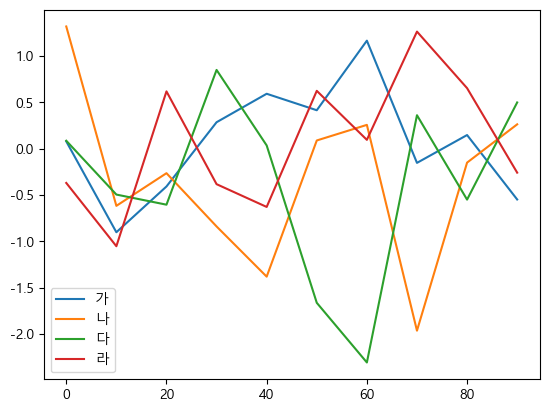

In [94]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["가", "나", "다", "라"], index=np.arange(0, 100, 10))
df
df.plot()  # DataFrame을 이루는 하나의 Series가 하나의 그래프를 이룸

<AxesSubplot:>

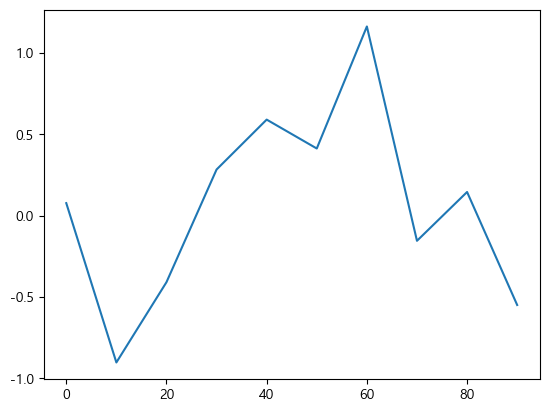

In [96]:
df["가"].plot()

## 3) 막대 그래프

<BarContainer object of 4 artists>

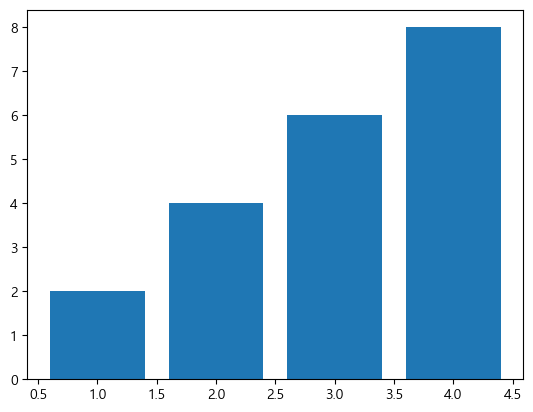

In [97]:
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

plt.bar(x, y)

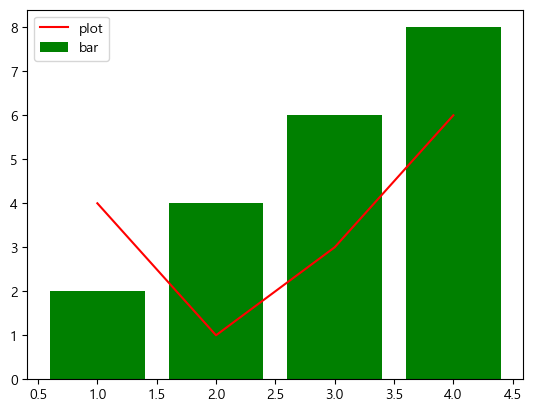

In [104]:
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

x2 = np.array([1, 2, 3, 4])
y2 = np.array([4, 1, 3, 6])

plt.bar(x, y, color="green", label="bar")
plt.plot(x2, y2, color="red", label="plot")

plt.legend()    # 범례를 나타내기 위해 사용

([<matplotlib.patches.Wedge at 0x24370e2b9a0>,
 [Text(0.9910657451172095, 0.47727213291294374, 'a'),
  Text(0.24477296280441296, 1.0724207181325571, 'b'),
  Text(-0.9910658121453628, 0.4772719937275313, 'c'),
  Text(0.24477321382259096, -1.072420660839281, 'd')])

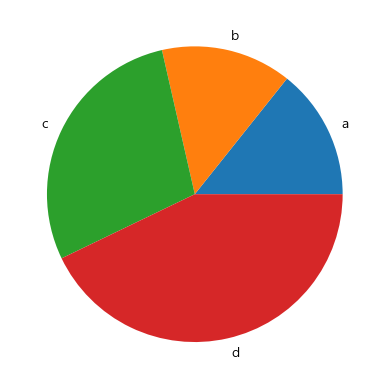

In [107]:
data =[1, 1, 2, 3]
label = ["a", "b", "c", "d"]

plt.pie(data, labels=label)

<AxesSubplot:>

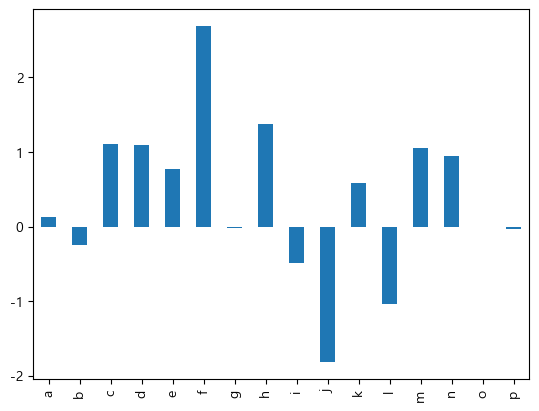

In [113]:
s = pd.Series(np.random.randn(16), index=list("abcdefghijklmnop"))

s.plot(kind="bar")
s.plot.bar()

<AxesSubplot:>

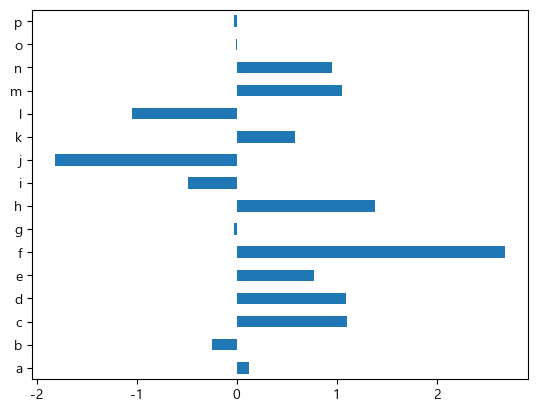

In [116]:
s.plot.barh()  # 글자끼리 겹치는 것을 피함
s.plot(kind="barh")

<AxesSubplot:>

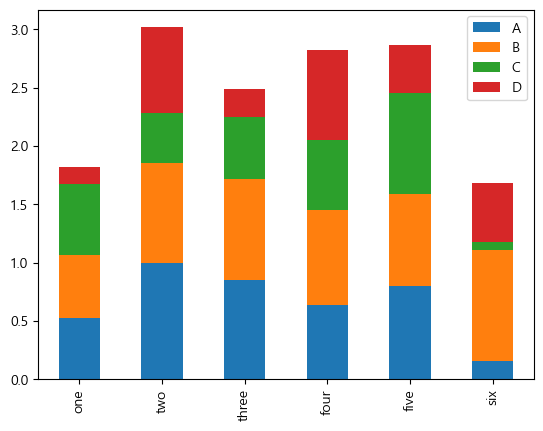

In [127]:
df = pd.DataFrame(np.random.rand(6, 4), index=["one", "two", "three", "four", "five", "six"],
                 columns=["A", "B", "C", "D"])

# df.plot(kind="bar")
df.plot(kind="bar", stacked=True)

## 4) Histogram

- 막대 사이에 간격이 없음
- 값만 필요하고 인덱스는 필요없음(축 하나만 필요)

In [129]:
s = pd.Series(np.random.normal(0, 1, size=100))
s

0    -0.657447
1    -0.366970
2    -2.488319
3     0.078274
4    -1.216326
        ...   
95    2.136923
96   -2.699845
97    1.042340
98    0.986601
99   -0.200825
Length: 100, dtype: float64

<AxesSubplot:>

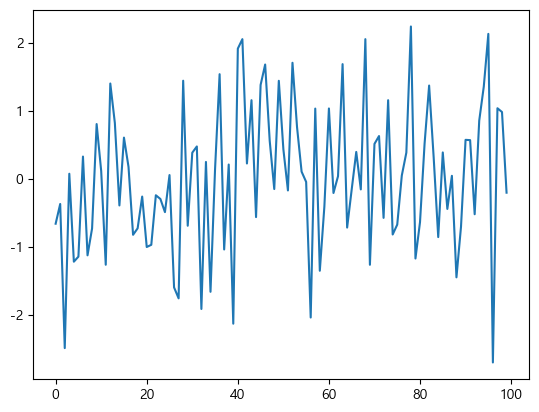

In [130]:
s.plot()

<AxesSubplot:>

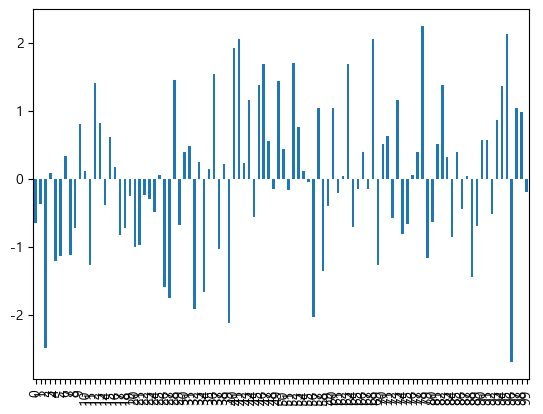

In [136]:
s.plot(kind="bar")

<AxesSubplot:>

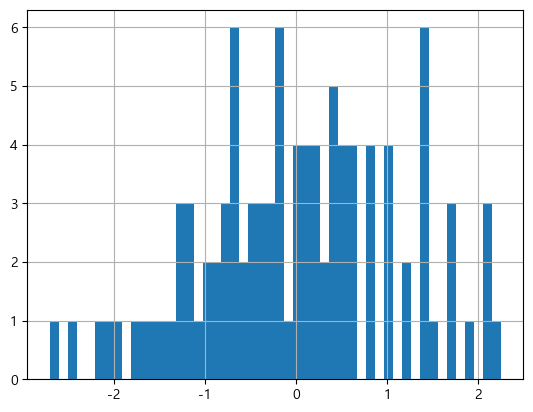

In [139]:
s.hist(bins=50)  # bins : 막대의 개수 지정 가능

## 5) Scatter Plot(산포도, 산점도)

- 두 변수의 관계를 확인할 때 : 양수(양의 관계), 음수(음의 관계), 0(관계X)
- c=tips["sex_color"] : color 지정, 배열이 넘어가야 함
- alpha=0.7 : color의 투명도 지정
- s=tips["size"]*20 : 점의 크기 지정

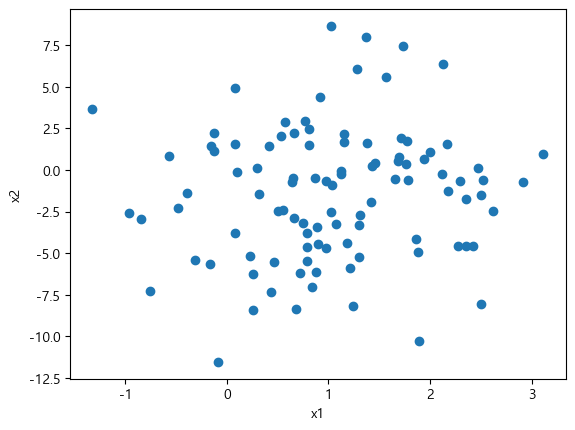

In [4]:
x1 = np.random.normal(1, 1, size=(100, 1))
x2 = np.random.normal(-2, 4, size=(100, 1))

x = np.concatenate((x1, x2), axis=1)

df = pd.DataFrame(x, columns=["x1", "x2"])

df.plot.scatter("x1", "x2")
plt.scatter(df["x1"], df["x2"])

## 6) Box Plot

- 사분위수
- plt.boxplot(x(배열로 넘겨줘야 함), labels=x축라벨지정)

<AxesSubplot:>

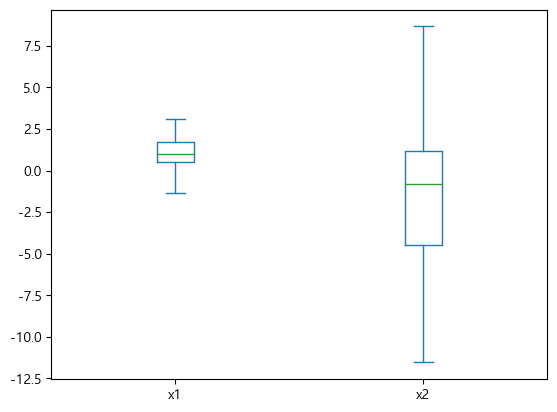

In [6]:
df.plot.box()

# 5. ❕❗ 실습1 ❕❗

- seaborn의 tips

## 1) Data Definition

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2) Visualization

### (1) total_bill에 대한 금액 분포 확인

- 변수가 하나 -> 히스토그램이 유리

Text(0, 0.5, 'Frequency')

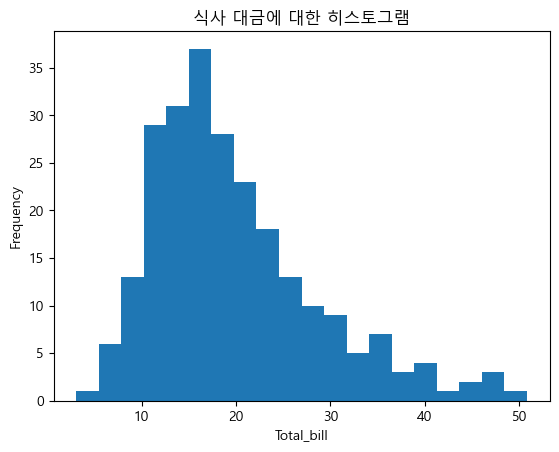

In [158]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(tips["total_bill"], bins=20)
ax.set_title("식사 대금에 대한 히스토그램") # 제목붙이기
ax.set_xlabel("Total_bill")                 # 축 이름 붙이기
ax.set_ylabel("Frequency")

### (2) total_bill과 tip의 관계

- 산포도

Text(0, 0.5, 'Tip')

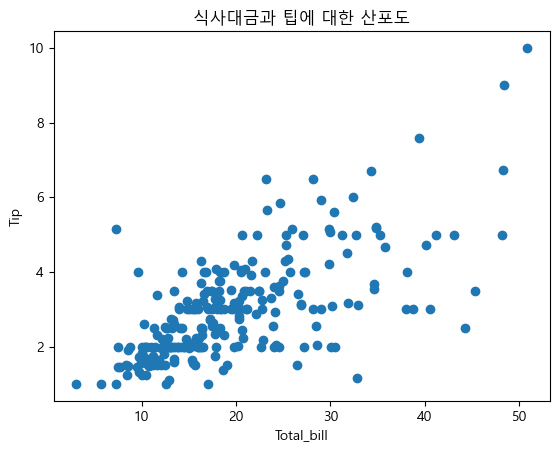

In [163]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(tips["total_bill"], tips["tip"])
ax.set_title("식사대금과 팁에 대한 산포도")
ax.set_xlabel("Total_bill")
ax.set_ylabel("Tip")

### (3) 성별에 따른 total_bill과 tip의 관계

- 남자와 여자의 색을 다르게 표현

In [11]:
def record_sex(sex):
    if sex == "Female":
        return 0
    else:
        return 1

#################################################

tips["sex_color"] = tips["sex"].apply(record_sex)
tips

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


Text(0, 0.5, 'Tip')

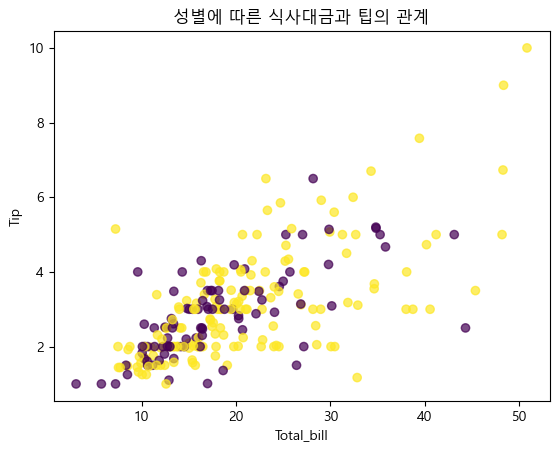

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_color"], alpha=0.7)  # 어떤 색이 무엇인지 알 수 없음. 데이터를 알아야..
ax.set_title("성별에 따른 식사대금과 팁의 관계")
ax.set_xlabel("Total_bill")
ax.set_ylabel("Tip")

### (4) 성별과 인원수에 따른 total_bill과 tip의 관계

- 점의 크기를 조정 -> 인원수를 표현

Text(0, 0.5, 'Tip')

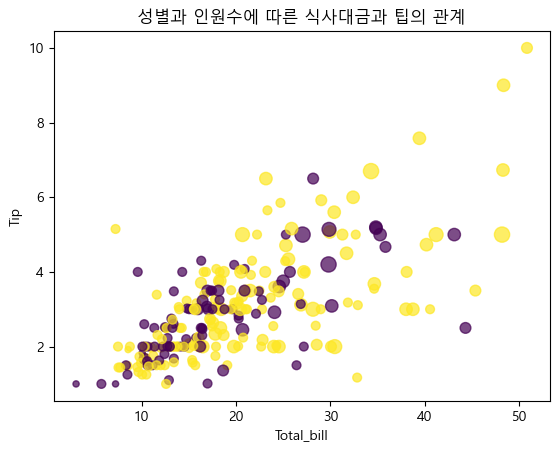

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_color"], alpha=0.7, s=tips["size"]*20)
ax.set_title("성별과 인원수에 따른 식사대금과 팁의 관계")
ax.set_xlabel("Total_bill")
ax.set_ylabel("Tip")

### (5) 성별과 팁의 관계

Text(0.5, 1.0, '성별에 따른 팁의 관계')

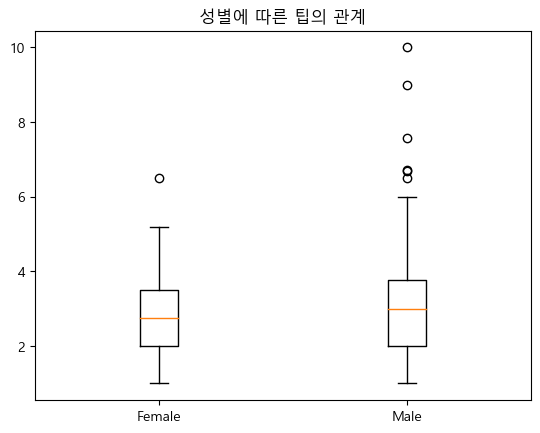

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.boxplot([tips[tips["sex"]=="Female"]["tip"], tips[tips["sex"]=="Male"]["tip"]], labels=["Female", "Male"])
ax.set_title("성별에 따른 팁의 관계")

In [32]:
?plt.boxplot

# 6. ❕❗ 실습2 ❕❗

- https://www.data.go.kr/  : 공공데이터
- 전국 신규 민간 아파트 분양가격 동향

## 1) Data Definition

- https://www.data.go.kr/data/15061057/fileData.do

In [84]:
apt = pd.read_csv("data/20200331.csv", encoding="EUC-KR")
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4590 non-null   object
 1   규모구분     4590 non-null   object
 2   연도       4590 non-null   int64 
 3   월        4590 non-null   int64 
 4   분양가격(㎡)  4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [81]:
apt.head(10)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
5,인천,전체,2015,10,3163
6,인천,전용면적 60㎡이하,2015,10,3488
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545
9,인천,전용면적 102㎡초과,2015,10,3408


## 2) Data Preprocessor

- column명을 영어로 변경 : city, size, year, month, price
- price는 데이터 타입을 숫자로 변경

In [85]:
apt1 = apt.copy()  # 데이터 변경 시 항상 원본 남여두기

col_name = [ "city", "size", "year", "month", "price"]

apt1.columns = col_name
apt1

,city,size,year,month,price
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4585,제주,전체,2020,3,3955
4586,제주,전용면적 60㎡이하,2020,3,4039
4587,제주,전용면적 60㎡초과 85㎡이하,2020,3,3962
4588,제주,전용면적 85㎡초과 102㎡이하,2020,3,NaN


In [83]:
apt1["price"] = pd.to_numeric(apt1["price"].str.strip())   # 공백제거 후 숫자로 변경
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    4590 non-null   object 
 1   size    4590 non-null   object 
 2   year    4590 non-null   int64  
 3   month   4590 non-null   int64  
 4   price   4260 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 179.4+ KB


In [89]:
# dtype 바꾸는 또다른 방법 (비추천)
# apt1["price"] = apt1["price"].replace("  ", 0).astype("float64")  ->  정확한 공백의 수를 알아야 함
# apt1.info()

## 3) EDA

### (1) 연도별로 평균 가격 조회

In [108]:
apt_mean = apt1.groupby("year").mean().round(2)[["price"]]
apt_mean

,price
year,
2015,2657.47
2016,2922.37
2017,3143.31
2018,3326.95
2019,3693.42
2020,3856.07


<AxesSubplot:>

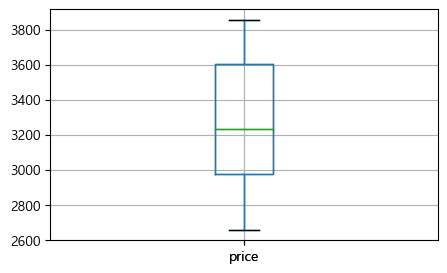

In [111]:
apt_mean.plot.box(figsize=(5, 3))     # series 타입일 땐 plot.box로 가능
apt_mean.boxplot()

### (2) 도시별, 연도별 순으로 평균 가격 조회

- pivot_table 사용

<AxesSubplot:>

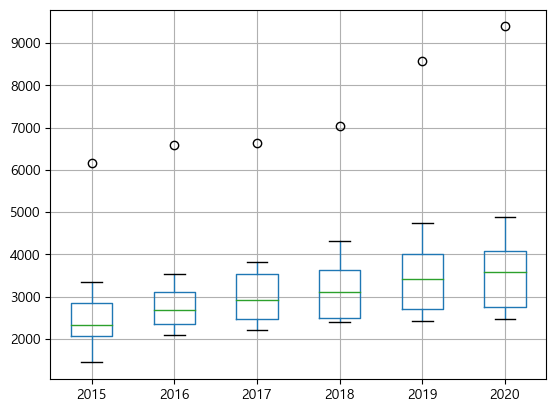

In [161]:
city_apt_mean = apt1.pivot_table(values="price", index="city", columns="year")
city_apt_mean.boxplot()
# print(city_apt_mean)

### (3) 서울만 선택하여 "전체" size 조회

In [186]:
%%time
apt_seoul = apt1[(apt1["city"]=="서울") & (apt1["size"]=="전체")]

Wall time: 997 µs


In [156]:
%%time
apt1.query('(city=="서울") and (size=="전체")')  # 쿼리 형식으로도 조회 가능 but 속도 느림

Wall time: 3.95 ms


,city,size,year,month,price
0,서울,전체,2015,10,5841.0
85,서울,전체,2015,11,6050.0
170,서울,전체,2015,12,6041.0
255,서울,전체,2016,1,6108.0
340,서울,전체,2016,2,6111.0
425,서울,전체,2016,3,6173.0
510,서울,전체,2016,4,6241.0
595,서울,전체,2016,5,6264.0
680,서울,전체,2016,6,6208.0
765,서울,전체,2016,7,6254.0


### (4) apt_seoul에서 city와 size 제거하고 다중인덱스 설정(year, month)

- del : 주로 컬럼제거 / drop : 주로 행제거

In [162]:
del apt_seoul["city"]
del apt_seoul["size"]

In [187]:
apt_seoul.drop(["city", "size"], axis=1, inplace=True)

C:\Users\acorn\AppData\Local\Temp\ipykernel_13980\3602960392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt_seoul.drop(["city", "size"], axis=1, inplace=True)


In [188]:
apt_seoul = apt_seoul.set_index(["year", "month"])

price
year month        
2015 10     5841.0
     11     6050.0
     12     6041.0
2016 1      6108.0
     2      6111.0
     3      6173.0
     4      6241.0
     5      6264.0
     6      6208.0
     7      6254.0
     8      6285.0
     9      6283.0
     10     6400.0
     11     6370.0
     12     6443.0
2017 1      6450.0
     2      6464.0
     3      6370.0
     4      6366.0
     5      6400.0
     6      6667.0
     7      6573.0
     8      6172.0
     9      6507.0
     10     6578.0
     11     6657.0
     12     6706.0
2018 1      6623.0
     2      6631.0
     3      6836.0
     4      6841.0
     5      6919.0
     6      6694.0
     7      6820.0
     8      6731.0
     9      6994.0
     10     7378.0
     11     7369.0
     12     7398.0
2019 1      7600.0
     2      7627.0
     3      7772.0
     4      7784.0
     5      7786.0
     6      8100.0
     7      8067.0
     8      8093.0
     9      8085.0
     10     8091.0
     11     8062.0
     12     7955.0
2020 1      8121.0
     2      7972.0
     3      8029.0

<AxesSubplot:xlabel='year,month'>

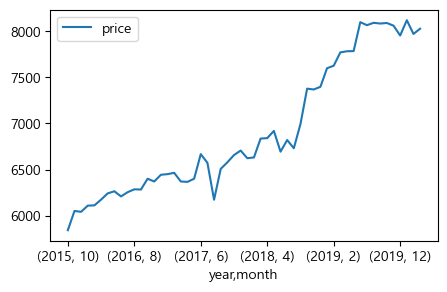

In [191]:
apt_seoul.plot(figsize=(5, 3))

# 7. seaborn

- sns.histplot : 히스토그램
- sns.countplot("day", data=tips) : 막대 그래프
    - sns.barplot(x="time", y="total_bill", data=tips)
- sns.regplot(x="total_bill", y="tip", data=tips) : 산포도
    - fit_reg=False
- sns.jointplot(x="total_bill", y="tip", data=tips) : 산포도와 히스토그램을 같이 보여줌
- sns.kdeplot(x="total_bill", y="tip", data=tips) : 밀도를 표현한 그래프
    - shade=True : 그림자 연출
- sns.boxplot(x="time", y="total_bill", data=tips) : 상자그래프
- sns.violinplot(x="time", y="total_bill", data=tips) : 바이올린모양 그래프
- sns.pairplot(tips) : 한번에 여러 개의 변수들에 대해 관계 확인
- sns.lmplot(x="total_bill", y="tip", data=tips, fit_reg=False) : 산포도와 비슷
    - hue="sex" : 속성을 색으로 구분 가능하게 만들어줌
    - markers=["o", "x"] : 점의 모양 각각 다르게 지정 가능

-----

- kind="hex" : 점의 모양  다양하게 변경 가능

In [200]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1) total_bill에 대한 금액 분포 확인

Text(0, 0.5, 'total bill')

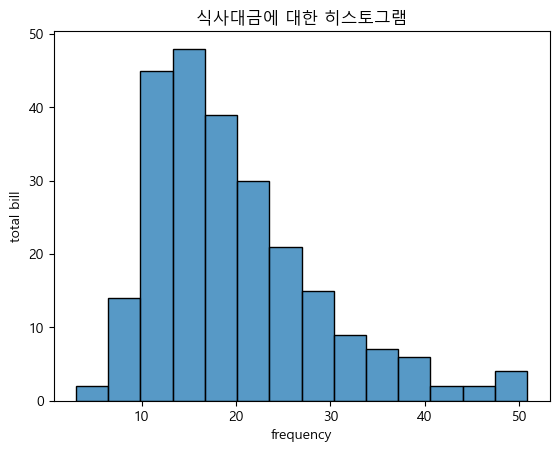

In [204]:
# ax = sns.distplot(tips["total_bill"])  -> 사라질 예정..
ax = sns.histplot(tips["total_bill"])

ax.set_title("식사대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("total bill")

## 2) 요일별 인원수 파악

C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

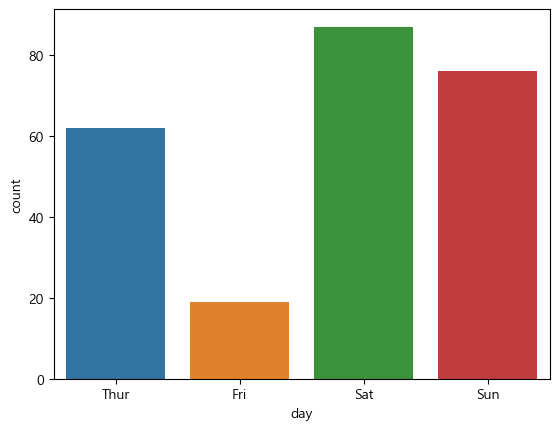

In [208]:
sns.countplot("day", data=tips)

## 3) total_bill과 tip의 관계 조회

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

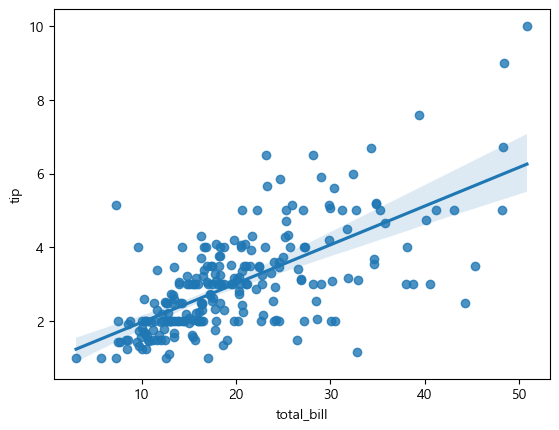

In [209]:
sns.regplot(x="total_bill", y="tip", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

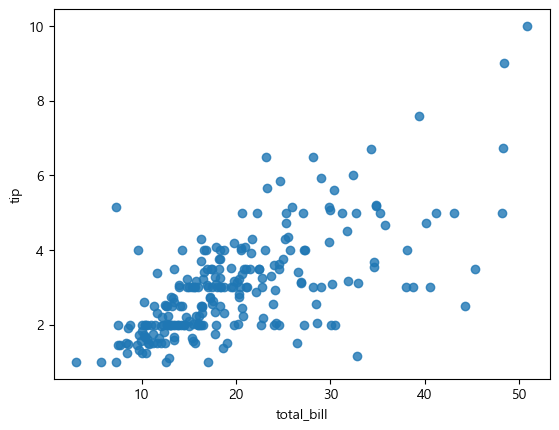

In [210]:
sns.regplot(x="total_bill", y="tip", data=tips, fit_reg=False)

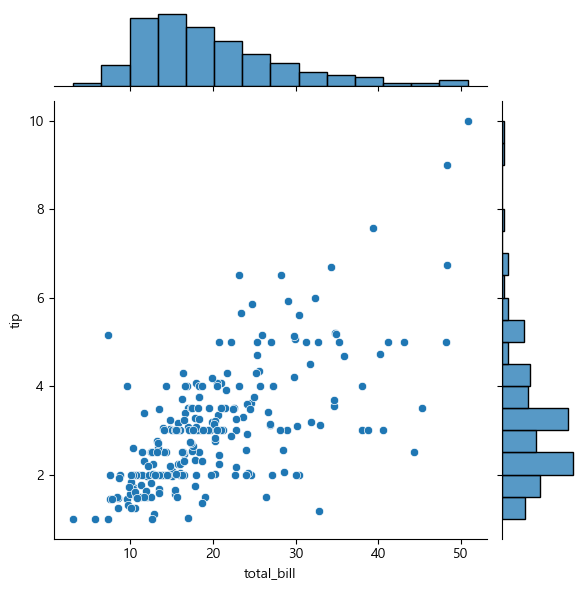

In [211]:
sns.jointplot(x="total_bill", y="tip", data=tips)

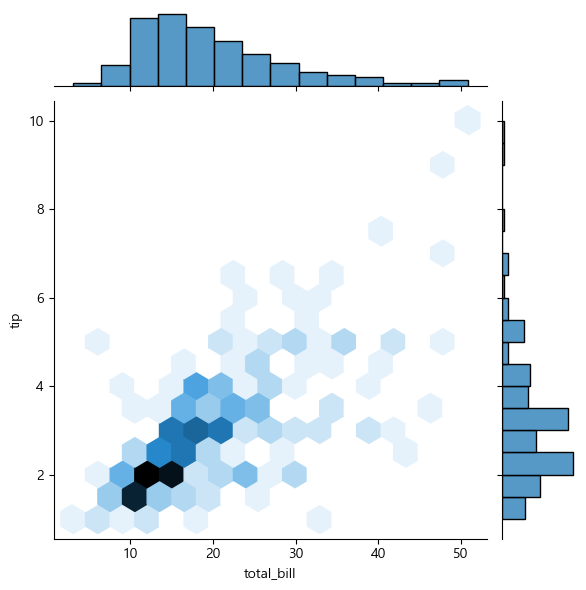

In [212]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

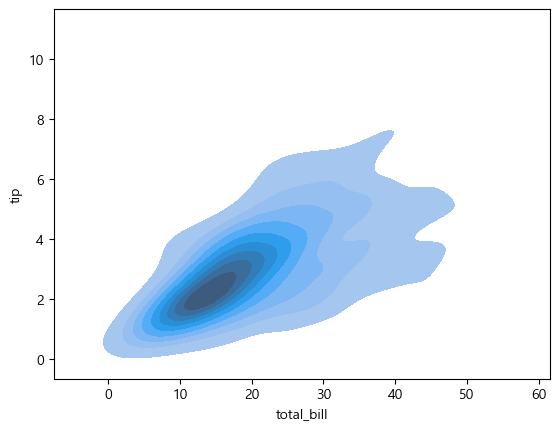

In [214]:
sns.kdeplot(x="total_bill", y="tip", data=tips, shade=True)

## 4) 시간에 따른 식사요금

<AxesSubplot:xlabel='time', ylabel='total_bill'>

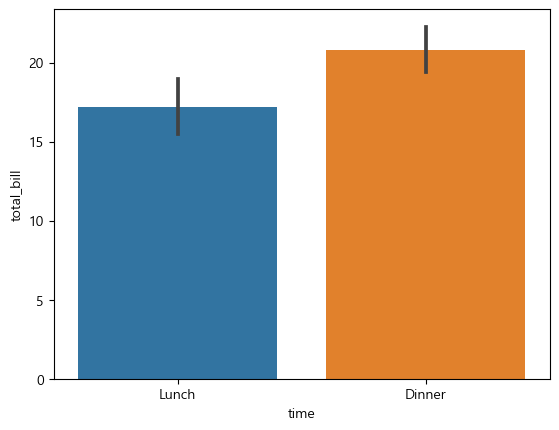

In [216]:
sns.barplot(x="time", y="total_bill", data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

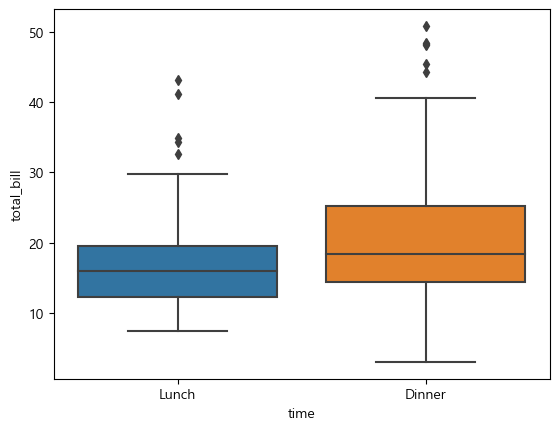

In [217]:
sns.boxplot(x="time", y="total_bill", data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

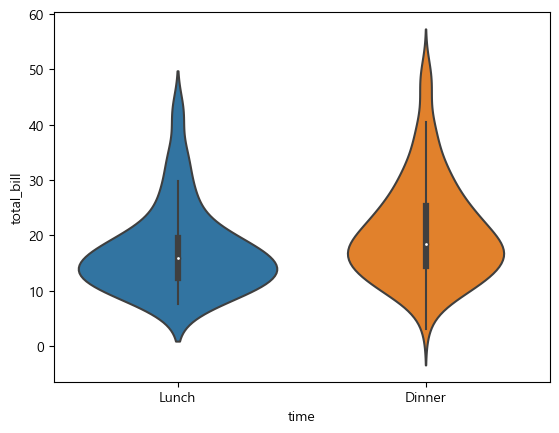

In [218]:
sns.violinplot(x="time", y="total_bill", data=tips)

## 5) 한번에 여러 개의 변수들에 대해 관계 확인

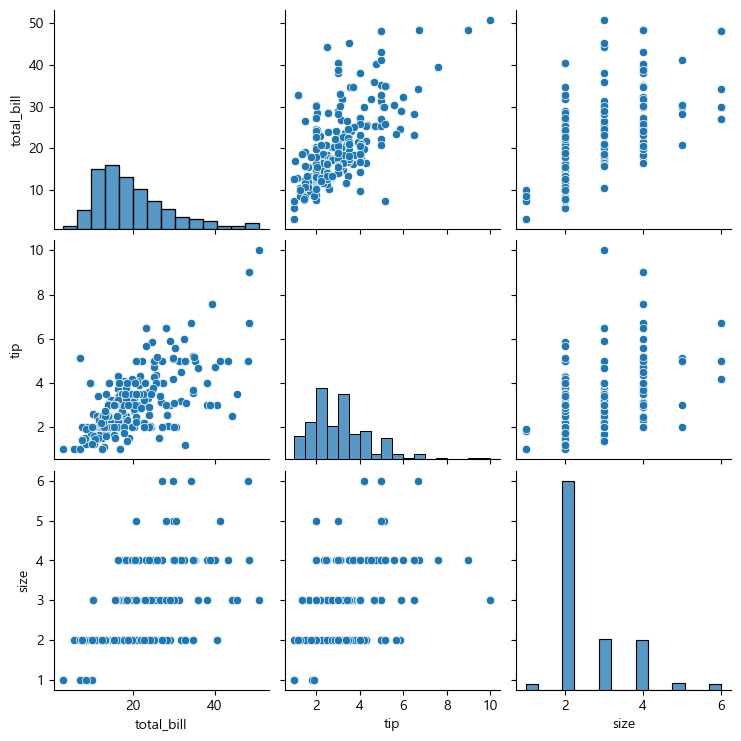

In [219]:
sns.pairplot(tips)

## 6) 성별에 따른 total_bill과 tip의 관계¶

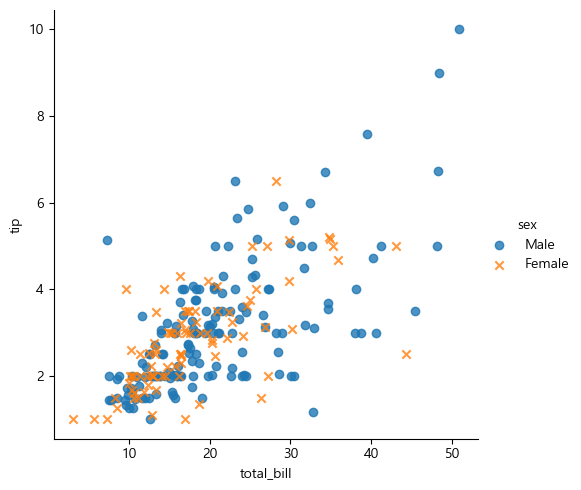

In [223]:
sns.lmplot(x="total_bill", y="tip", data=tips, fit_reg=False, hue="sex", markers=["o", "x"])

# 8. ❕❗ 실습3 ❕❗

- http://www.kaggle.com
- 타이타닉 샘플
    - http://www.kaggle.com/c/titanic
    - 각 변수가 생존에 어느정도 영향을 미첬나
    - Survived : 종속변수(결과), 우리가 알고 싶은 중요한 / 나머지 : 독립변수(원인), 결과에 원인이 될만한
    - SibSp : 형제자매 혹은 배우자와의 동승여부 / Parch : 부모 혹은 자녀와의 동승여부 / Cabin : 짐칸 번호 / Embarked : 경유지

## 1) Data Definition

In [2]:
train = pd.read_csv("data/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#### ❗결측치 확인❗ ####

train.isnull().sum()   # 각 컬럼마다 결측치의 개수 확인 가능

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2) EDA

In [5]:
def bar_chart(feature):
    surv = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([surv, dead], index=["survived", "dead"])
    df.plot(kind="bar", stacked=True, figsize=(5, 3))

### (1) 성별에 따른 생존 여부

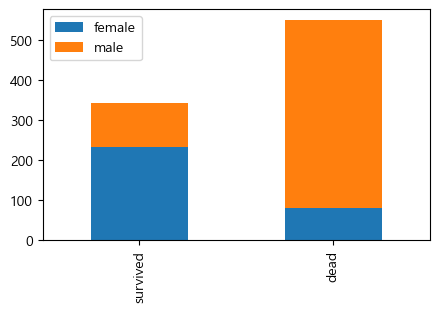

In [262]:
bar_chart("Sex")  # 영향이 있어보임

### (2) 객실 등급에 따른 생존 여부

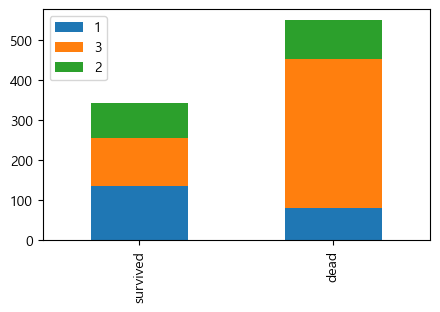

In [263]:
bar_chart("Pclass")  # 영향이 있어보임

### (3) 형제자매 혹은 배우자 동승 여부에 따른 생존 여부

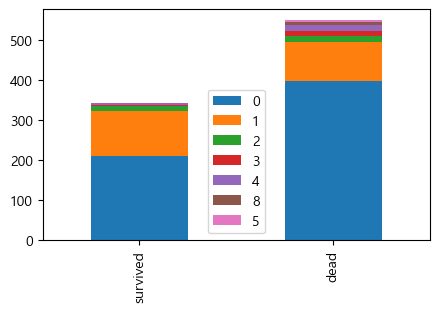

In [264]:
bar_chart("SibSp")  # 영향이 있어보임

### (4) 부모나 자식 동승여부에 따른 생존 여부

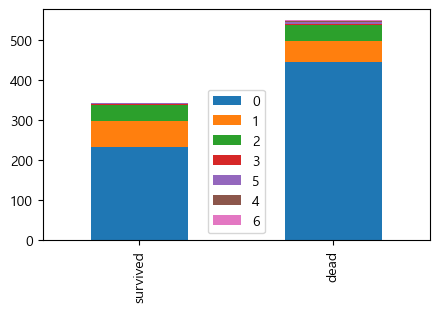

In [265]:
bar_chart("Parch")

### (5) 경유지에 따른 생존 여부

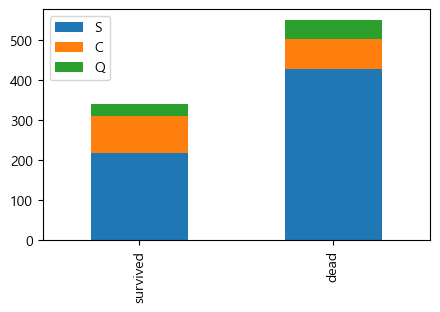

In [266]:
bar_chart("Embarked")

## 3) Feature Engineering(특성 공학 -> 전처리(ETL))

- Feature : 결과에 영향을 미치는 컬럼을 의미
- 전처리(ETL : Extract Transform Load)

### (1) 이름에서 호칭 추출

- 의미가 없는 변수 같아 보여도 잘 찾으면 연결시킬 수 있음! 변수가 많을수록 좋다.
- str.extract() : 정규표현식 사용 가능

In [12]:
# train["Name"].str.extract(" ([a-zA-Z]+\.)")[0].unique()
train["Title"] = train["Name"].str.extract(" ([a-zA-Z]+)\.")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [13]:
train["Title"].value_counts()  # Mr, Miss, Mrs 3개정도 쓸만한 데이터 같아 보임

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [16]:
train["Name"].str.extract(" ([a-zA-Z]+)\.")[0].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [21]:
title_map = {'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Don':3, 'Rev':3, 'Dr':3, 'Mme':3,
             'Ms':3, 'Major':3, 'Lady':3, 'Sir':3, 'Mlle':3, 'Col':3, 'Capt':3,
             'Countess':3, 'Jonkheer':3}

train["Title_num"] = train["Title"].map(title_map)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,0


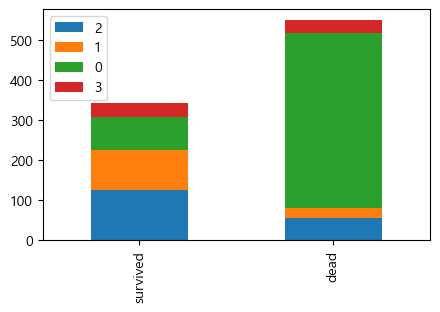

In [22]:
bar_chart("Title_num")

### (2) Age 결측치 조정

- 결측치 조정
    - 제거
    - 대체
        - 평균, 중앙값
        - 예측 -> 회기분석

- train["Age"].fillna(train.groupby("Title_num")["Age"].transform("median"), inplace=True)
    - transform으로 매핑해줘야 "각각의" 결측치 범위에 맞는 값 찾아서 추가 가능

----

    facet = sns.FacetGrid(train) : 함수 그릴 위치 저장
        hue="Survived" : 색 표현, aspect=2.5 : 크기 조정

    facet.map(sns.kdeplot, "Age") : 실제 그릴 함수 지정
    
    facet.add_legend() : 범례 표현
    facet.set(xlim=(0, train["Age"].max())) : x축 사이즈 지정
    
    plt.xlim(0, 20) : 특정 구간만 잘라서 보기
    
----

In [54]:
train["Age"].fillna(train.groupby("Title_num")["Age"].transform("median"), inplace=True)

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
 13  Title_num    891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


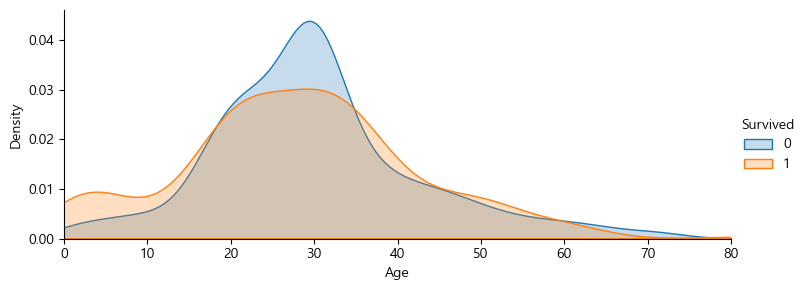

In [56]:
facet = sns.FacetGrid(train, hue="Survived", aspect=2.5)    # 함수 그릴 위치 저장
facet.map(sns.kdeplot, "Age", shade=True)   # 실제 그릴 함수 지정
facet.add_legend()  # 범례 표현
facet.set(xlim=(0, train["Age"].max()))

(0.0, 20.0)

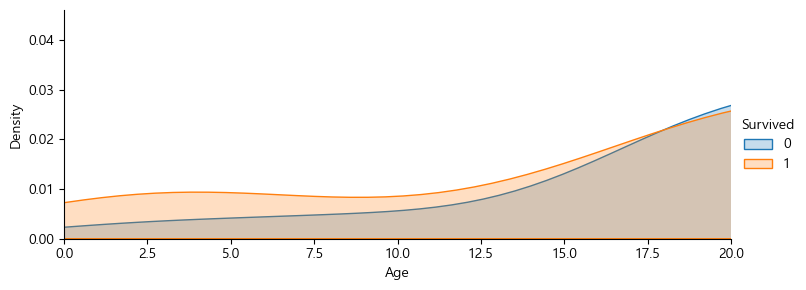

In [52]:
facet = sns.FacetGrid(train, hue="Survived", aspect=2.5)
facet.map(sns.kdeplot, "Age", shade=True)
facet.add_legend()
facet.set(xlim=(0, train["Age"].max()))

plt.xlim(0, 20)  # 특정 구간만 잘라서 보기 가능

(25.0, 45.0)

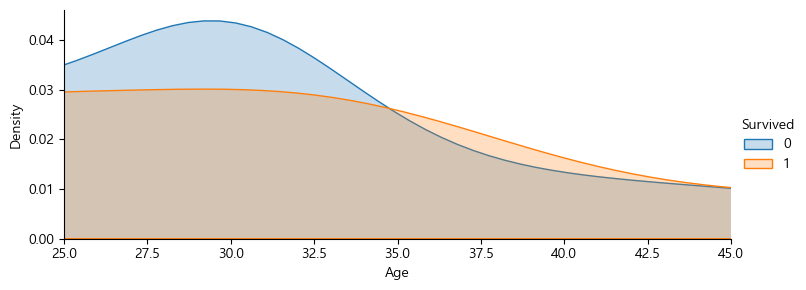

In [60]:
facet = sns.FacetGrid(train, hue="Survived", aspect=2.5)
facet.map(sns.kdeplot, "Age", shade=True)
facet.add_legend()
facet.set(xlim=(0, train["Age"].max()))

plt.xlim(25, 45)

# 9. 지도 시각화

- pip install folium

- folium.Map(location=[37.5206868,127.1214941])
    - zoom_start=15 : 사이즈
    - tiles="Stamen Toner" : 경로 강조
    
- map.choropleth(geo_data=state_geo, data=state_unemp, key_on="feature.id", columns=["key", "values"])
    - 지정된 인자값을 지도 위에 표시할 수 있게 해주는 함수

In [65]:
import folium

In [76]:
# folium.Map(location=[37.5206868,127.1214941], zoom_start=15)


folium.Map(location=[37.5206868,127.1214941], zoom_start=15, tiles="Stamen Toner")

## 1) 미국 50개주의 실업률 지도 위에 표시

    state_geo = "data/map/folium_us-states.json"   # 위도와 경도가 저장된 파일
    map = folium.Map(location=[40, -98], zoom_start=4)
    map.choropleth(geo_data=state_geo, data=state_unemp, key_on="feature.id",
                  columns=["State", "Unemployment"], fill_color="YlGn")   # 지정된 인자값을 지도 위에 표시할 수 있게 해주는 함수

In [78]:
state_unemp = pd.read_csv("data/map/folium_US.csv")
state_unemp.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [93]:
state_geo = "data/map/folium_us-states.json"   # 50개 주들의 위도와 경도가 저장된 파일

map = folium.Map(location=[40, -98], zoom_start=4)

map.choropleth(geo_data=state_geo, data=state_unemp, key_on="feature.id",
              columns=["State", "Unemployment"], fill_color="YlGn")   # 지정된 인자값을 지도 위에 표시할 수 있게 해주는 함수
map

## 2) Marking

    folium.Marker(location=[위도, 경도], icon="원하는 모양", popup="메모 가능").add_to(map)
    
    folium.CircleMarker(location=[37.5125585, 127.1025353], popup="롯데월드 옆", radius=50).add_to(map)
        - color="#ffffgg", fill_color="#ffffgg"

In [102]:
map = folium.Map(location=[37.5125585, 127.1025353], zoom_start=15)
map

# marker = folium.Marker(location=[37.5125585, 127.1025353], icon=folium.Icon(color="red", icon="star"))
# marker.add_to(map)
folium.Marker(location=[37.5125585, 127.1025353], icon=folium.Icon(color="red", icon="star"),
             popup="오후2시 약속장소").add_to(map)

folium.CircleMarker(location=[37.5111158, 127.098167], popup="롯데타워 옆", radius=50,
                   color="#ffffgg", fill_color="#ffffgg").add_to(map)

map

## (3) 많은 내용의 팝업메시지 작성

    from folium import IFrame
    iframe = IFrame(text, width="300", height="200")
    pop = folium.Popup(iframe, max_width=3000)

In [105]:
from folium import IFrame

map = folium.Map(location=[37.5125585, 127.1025353], zoom_start=15)

text = """많은 양의 
텍스트를 입력하였음
기타 등등 ...
"""
iframe = IFrame(text, width="300", height="200")
pop = folium.Popup(iframe, max_width=3000)

folium.Marker(location=[37.5125585, 127.1025353], icon=folium.Icon(color="red", icon="star"),
             popup=pop).add_to(map)

map

------
AI
- 이미지
- Text(자연어처리)
    - 텍스트마이닝

# 10. WordCloud

- pip install wordcloud
    
        WordCloud().generate(text)
            - max_font_size=40, background_color="white" : 최대 폰트 사이즈, 배경 색 지정
            - mask=alice_mask : 이미지위에 넣기
            - stopwords=STOPWORDS : 불용어 사전
            - max_words=100 : 나타날 글자수 지정
        plt.imshow(wc)
            - interpolation="bilinear" : 계단 현상 줄이기

In [144]:
from wordcloud import WordCloud, STOPWORDS
# STOPWORDS : 불용어 사전

(-0.5, 399.5, 199.5, -0.5)

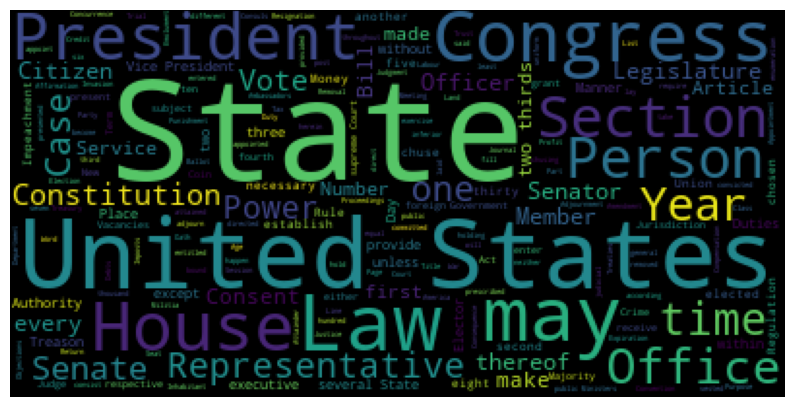

In [119]:
text = open("data/wordcloud/constitution.txt").read()
text

wc = WordCloud().generate(text)
wc.words_  # 명사 뽑아내기

plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis("off") # 눈금 없애기

(-0.5, 399.5, 199.5, -0.5)

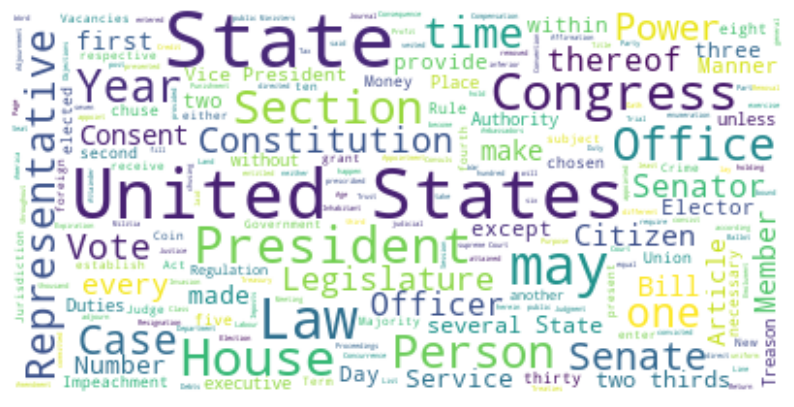

In [124]:
wc = WordCloud(max_font_size=40, background_color="white").generate(text)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")  # 계단 현상 줄이기
plt.axis("off")

### 🔅이미지에 텍스트 넣기🔅

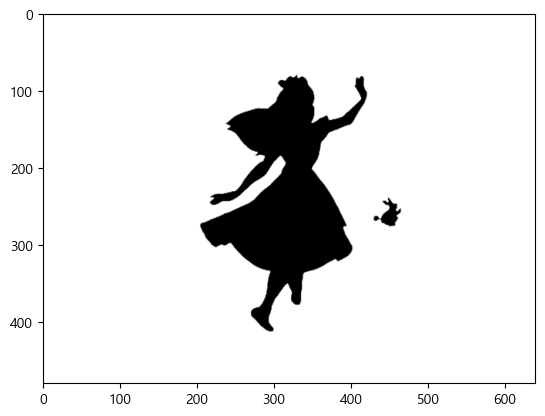

In [132]:
from PIL import Image  # 이미지 불러오기

alice_mask = np.array(Image.open("data/wordcloud/alice_mask.png"))   # 이미지의 숫자를 배열로 저장
alice_mask.shape
plt.imshow(alice_mask)

(-0.5, 639.5, 479.5, -0.5)

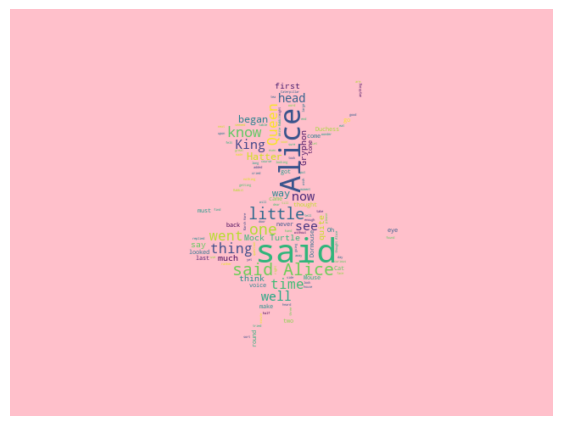

In [150]:
text = open("data/wordcloud/alice.txt").read()
wc = WordCloud(max_font_size=40, background_color="pink", mask=alice_mask).generate(text)

plt.figure(figsize=(7, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

(-0.5, 639.5, 479.5, -0.5)

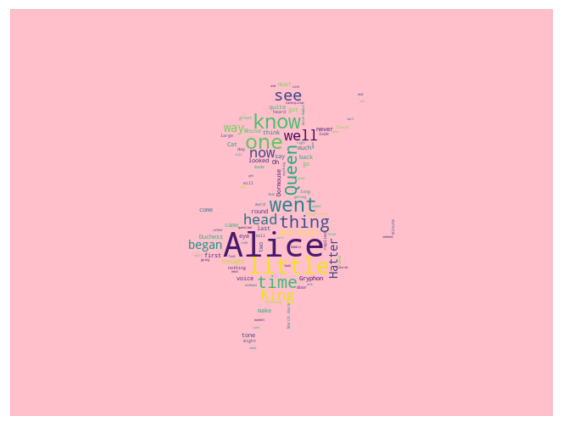

In [155]:
#### 불용어 처리 #####

STOPWORDS.add("said")  # 불용어 추가

wc = WordCloud(max_font_size=40, background_color="pink", mask=alice_mask, stopwords=STOPWORDS,
              max_words=100).generate(text)

plt.figure(figsize=(7, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

(-0.5, 599.5, 799.5, -0.5)

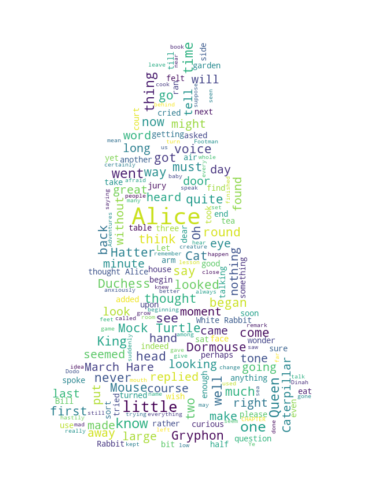

In [160]:
alice_mask1 = np.array(Image.open("data/wordcloud/alice.png"))

wc = WordCloud(max_font_size=40, background_color="white", mask=alice_mask1, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(6, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

(-0.5, 599.5, 799.5, -0.5)

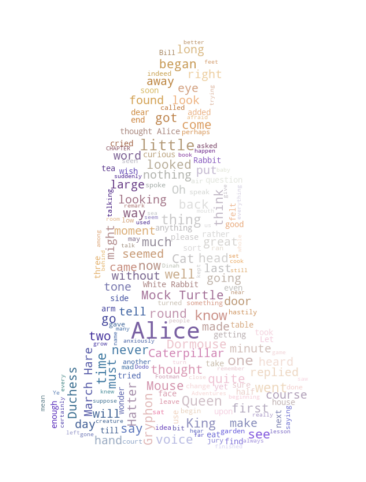

In [166]:
#### 배경이미지 색상에 맞춰 글자 뽑아내기 ####

import wordcloud

alice_mask1 = np.array(Image.open("data/wordcloud/alice.png"))
image_color = wordcloud.ImageColorGenerator(alice_mask1)  # 이미지 색 뽑아내기

wc = WordCloud(max_font_size=40, background_color="white", mask=alice_mask1, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(6, 6))
plt.imshow(wc.recolor(color_func=image_color), interpolation="bilinear")
plt.axis("off")

# 11. WordCloud의 한글처리

- http://konlpy.org
- pip install konlpy

    wc = WordCloud(max_font_size=40, background_color="white",
                   max_words=200, font_path="C:\Windows\Fonts\\malgun.ttf").generate_from_frequencies(dict(data))
    plt.figure(figsize=(7, 8))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")

    okt.nouns() : 단어 분리
    nltk.Text(token_ko) : 빈도수 처리(워드카운팅)

In [8]:
import konlpy
from konlpy.tag import Okt
from konlpy.corpus import kolaw

import nltk   # 단어 카운팅 해주는 모듈

from wordcloud import WordCloud

In [9]:
okt = Okt()
okt.nouns("아버지가방에들어가신다.")

['아버지', '가방']

In [10]:
#### 형태소 분석 ####

ko_text = kolaw.open("constitution.txt").read()
ko_text

token_ko = okt.nouns(ko_text)

print(len(token_ko))
# print(token_ko)

3882


In [11]:
#### 불용어 처리 ####

stop_words = ["제", "월", "일", "조", "수", "때", "그", "이", "바", "및", "안", "정", "위", "관"]

token_ko = [ word for word in token_ko if word not in stop_words ]
print(len(token_ko))

3211


In [12]:
#### 빈도수 처리(워드카운팅) ####

ko = nltk.Text(token_ko, name="대한민국 헌법")
dir(ko)

data = ko.vocab().most_common(150)
data

[('법률', 127),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('헌법', 53),
 ('모든', 37),
 ('기타', 26),
 ('사항', 23),
 ('권리', 21),
 ('의원', 21),
 ('자유', 20),
 ('정부', 20),
 ('선거', 20),
 ('임명', 20),
 ('직무', 19),
 ('국무총리', 19),
 ('경제', 18),
 ('의무', 18),
 ('조직', 18),
 ('국회의원', 18),
 ('임기', 18),
 ('의결', 17),
 ('공무원', 17),
 ('경우', 17),
 ('이상', 17),
 ('국무위원', 17),
 ('대법원', 17),
 ('범위', 16),
 ('장', 15),
 ('법관', 15),
 ('보호', 14),
 ('정책', 14),
 ('정당', 14),
 ('헌법재판소', 14),
 ('재적', 14),
 ('회의', 14),
 ('항의', 14),
 ('관리', 14),
 ('노력', 13),
 ('보장', 13),
 ('거나', 13),
 ('요구', 13),
 ('법원', 12),
 ('집회', 12),
 ('과반수', 12),
 ('출석', 12),
 ('찬성', 12),
 ('대한민국', 11),
 ('조약', 11),
 ('다만', 11),
 ('재판', 11),
 ('인', 11),
 ('동의', 11),
 ('탄핵', 11),
 ('권한', 11),
 ('안전보장', 10),
 ('공포', 10),
 ('대한', 10),
 ('심판', 10),
 ('시행', 10),
 ('재판관', 10),
 ('위원', 10),
 ('정치', 9),
 ('효력', 9),
 ('대하', 9),
 ('체포', 9),
 ('절차', 9),
 ('형사', 9),
 ('근로', 9),
 ('처분', 9),
 ('위원회', 9),
 ('행정각부', 9),
 ('명령', 9),
 ('사회', 8),
 ('질서', 8),
 ('생활

In [13]:
?ko.vocab

In [5]:
?WordCloud.generate_from_frequencies

(-0.5, 399.5, 199.5, -0.5)

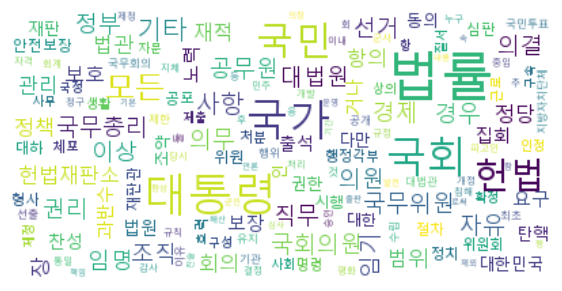

In [199]:
#### 워드 클라우드 ####

wc = WordCloud(max_font_size=40, background_color="white",
              max_words=200, font_path="C:\Windows\Fonts\\malgun.ttf").generate_from_frequencies(dict(data))

plt.figure(figsize=(7, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")